# CP6  Aprendizaje de Máquinas
---
## Algoritmos de Clustering: K-Means y DBSCAN

En esta clase práctica, exploramos cómo funcionan *K-means* y *DBSCAN*. Además, mostramos varios problemas de *K-means* y brindamos soluciones para abordar esos problemas, incluido el análisis de calidad de clúster.

In [48]:
# Start from importing necessary packages.
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

### Ejercicio 1: Análisis del dataset

In [49]:
# Generando datos.
# `random_state` es la semilla utilizada por el generador de números aleatorios (random number generator) para la reproducibilidad (default=None).
X, y = make_blobs(n_samples=5000,
                  n_features=2,
                  centers=3,
                  random_state=170)

In [50]:
X

array([[-4.01009423, -1.01473496],
       [ 1.00550526,  0.13163222],
       [ 2.06563121, -0.24527689],
       ...,
       [-5.09493013,  1.47160372],
       [-9.61459714, -4.91848716],
       [-7.72675795, -5.86656563]])

In [51]:
y

array([1, 2, 2, ..., 1, 0, 0])

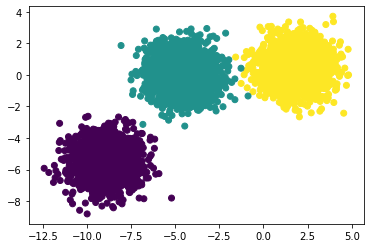

In [52]:
# Grafique la distribución de datos (_ground truth_) usando matplotlib `scatter(axis-x, axis-y, color)`.
plt.scatter(X[:,0], X[:,1], c=y)

### Ejercicio 2: Usando K-Means


#### El Algoritmo

El algoritmo de agrupamiento de Κ-means utiliza un refinamiento iterativo para producir un resultado final. Las entradas del algoritmo son el número de grupos $Κ$ y el conjunto de datos. El conjunto de datos es una colección de características para cada punto de datos. Los algoritmos comienzan con estimaciones iniciales para los centroides $Κ$, que pueden generarse aleatoriamente o seleccionarse aleatoriamente del conjunto de datos. Luego, el algoritmo itera entre dos pasos:

**Paso de asignación de datos**: Cada centroide define uno de los clústeres. En este paso, cada punto de datos se asigna a su centroide más cercano, en función de la distancia euclidiana al cuadrado. Más formalmente, si $c_i$ es la colección de centroides en el conjunto $C$, entonces cada punto de datos $x$ se asigna a un grupo basado en

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$
donde dist( · ) es la distancia euclidiana estándar ($L_2$). Sea $S_i$ el conjunto de asignaciones de puntos de datos para cada i-ésimo centroide de conglomerado.

**Paso de actualización del centroide**: en este paso, se vuelven a calcular los centroides. Esto se hace tomando la media de todos los puntos de datos asignados al grupo de ese centroide.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i }x_i$$

El algoritmo itera entre los pasos uno y dos hasta que se cumple un criterio de parada (es decir, ningún punto de datos cambia de grupo, la suma de las distancias se minimiza, se alcanza un número máximo de iteraciones o el desplazamiento de los centroides es menor que un umbral determinado).

**Convergencia e inicialización aleatoria**

Este algoritmo está garantizado para converger a un resultado. El resultado puede ser un óptimo local (es decir, no necesariamente el mejor resultado posible), lo que significa que evaluar más de una ejecución del algoritmo con centroides iniciales aleatorios puede dar un mejor resultado.

<img src=resources/K-means_convergence.gif style="width: 300px;"/>

In [53]:
""" K-means clustering algorithm.

Parameters
----------
n_init: int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
        
init: {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++'.
        
        'k-means++': selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence.
        
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.

tol: float, default: 1e-4
        Relative tolerance with regards to inertia to declare convergence
        tolerance is computed using `np.mean(np.var(X, axis=0)) * tol)`

"""
# Perform K-means on our data (Train centroids)
kmeans = KMeans(n_clusters=3,
                n_init=3,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit(X)

Initialization complete
Iteration 0, inertia 93044.0459798311
Iteration 1, inertia 11941.891546455789
Iteration 2, inertia 9733.27074914066
Converged at iteration 2: center shift 6.990341405572028e-05 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 49491.22189277588
Iteration 1, inertia 43229.84746448648
Iteration 2, inertia 42926.506753877606
Iteration 3, inertia 42574.50264772275
Iteration 4, inertia 41999.15634451147
Iteration 5, inertia 39853.96747003667
Iteration 6, inertia 28163.261111913802
Iteration 7, inertia 11338.224620471006
Iteration 8, inertia 9733.78264692831
Converged at iteration 8: center shift 0.0003771105416838141 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 35757.302667900425
Iteration 1, inertia 10003.823957399833
Iteration 2, inertia 9733.154277459327
Converged at iteration 2: strict convergence.


In [54]:
# Mostrar predicciones
kmeans.labels_

array([0, 2, 2, ..., 0, 1, 1], dtype=int32)

In [55]:
# Mostrar centros de clusters (centroides)
kmeans.cluster_centers_

array([[-4.55676387,  0.04603707],
       [-8.94710203, -5.51613184],
       [ 1.89450492,  0.5009336 ]])

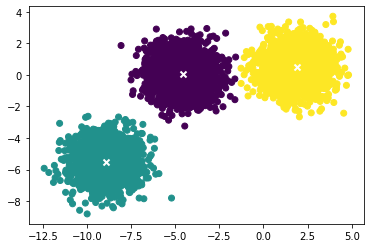

In [56]:
# Graficar las predicciones
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

In [57]:
# Podemos hacer nuevas predicciones sin volver a ejecutar kmeans (simplemente encuentre los centroides más cercanos).

""" El código siguiente es equivalente a:
y_pred = KMeans(...).fit_predict(X), pero esto necesita realizar `fit` nuevamente.
"""
X_new = np.array([[10,10], [-10, -10], [-5, 10]])
y_pred = kmeans.predict(X_new)

y_pred

array([2, 1, 0], dtype=int32)

In [58]:
# Podemos obtener distancias desde el punto de datos hasta cada centroide

"""El siguiente código es equivalente a:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(X_new, kmeans.cluster_centers_)
"""

kmeans.transform(X_new)

array([[17.63464636, 24.48965134, 12.48724601],
       [11.42592142,  4.60582976, 15.86659553],
       [ 9.96382639, 16.01030799, 11.73739582]])

### Ejercicio 3: Una forma más inteligente de inicializar centroides: K-means++

Dado que *K-means* depende en gran medida de la inicialización de los centroides, los resultados de la agrupación pueden converger a un mínimo local. Podemos abordar esto configurando `init='kmeans++'` en lugar de `'random'`. *K-means++* inicializa los centroides de una forma más inteligente para acelerar la convergencia. El algoritmo es como sigue:
1. Elija al azar un centroide de los puntos de datos.
2. Para cada punto de datos $x_i$, calcule la distancia $D(x_i, c_j)$ donde $c_j$ es el más cercano a $x_i$.
3. Elija al azar un nuevo punto de datos como un nuevo centroide utilizando *distribución de probabilidad ponderada* proporcional a $D(x_i, c_j)^2$.
4. Repita los pasos 2 y 3 hasta que se hayan elegido los centroides $k$.
5. Ahora que hemos inicializado los centroides, ejecute el algoritmo *K-means*.

In [59]:
# Perform K-means++ on our data.
kmeans_plus_plus = KMeans(n_clusters=3,
                n_init=3,
                init='k-means++',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit(X)

Initialization complete
Iteration 0, inertia 14504.163838606197
Iteration 1, inertia 9735.744827760533
Iteration 2, inertia 9733.167635199436
Converged at iteration 2: center shift 8.017874814659818e-06 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 10751.001848939788
Iteration 1, inertia 9733.461965137214
Converged at iteration 1: center shift 0.00012717967226942673 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 12316.398205045833
Iteration 1, inertia 9733.520322362503
Converged at iteration 1: center shift 0.00016219913816600552 within tolerance 0.0014634111435935595.


Puede ver que *K-means++* converge mucho más rápido que *K-means*!.

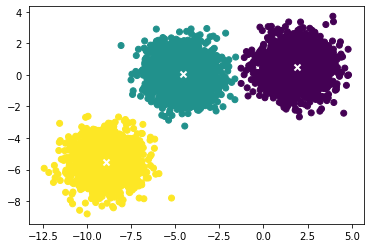

In [60]:
# Graficar las predicciones.
plt.scatter(X[:,0], X[:,1], c=kmeans_plus_plus.labels_)
plt.scatter(kmeans_plus_plus.cluster_centers_[:,0], 
            kmeans_plus_plus.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

### Ejercicio 4: Problemas de K-means

#### Problema 1: Necesita elegir un número correcto de clústeres

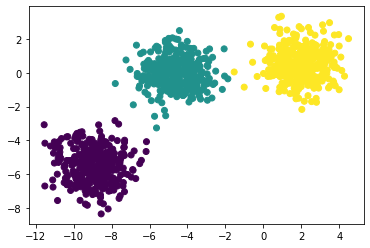

In [61]:
# Generar los datos.
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3,
                  random_state=170)

# Graficar la distribución.
plt.scatter(X[:,0], X[:,1], c=y)

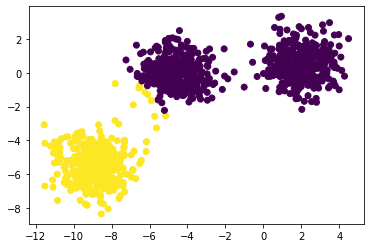

In [62]:
# Ejecute k-means en datos no esféricos.
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Graficar las predicciones.
plt.scatter(X[:,0], X[:,1], c=y_pred)

#### Solución: medir la calidad de los conglomerados para determinar el número de conglomerados--


##### Método supervisado
*Homogeneidad*: cada grupo contiene solo miembros de una sola clase.

*Integridad*: Todos los miembros de una clase determinada se asignan al mismo grupo.

##### Método no supervisado

**Coeficiente de Sihouette** (*Sihouette Coefficient*): Evalua qué tan bien están la **compacidad** y la **separación** de los clusters.
(Tenga en cuenta que la notación a continuación es consistente con el contenido anterior). Usando *Coeficiente de Sihouette*, podemos elegir un valor óptimo para el número de grupos.

***

$ a(x_i) $ denota la **distancia media dentro del grupo**. Evalua la compacidad del clúster al que pertenece $x_i$. (Cuanto más pequeño, más compacto)

$$ a(x_i) = \frac{ \sum_{x_k \in C_j ,\ k \neq i}{D(x_i, x_k)} }{\left\vert C_j \right\vert - 1} $$

Para el punto de datos $x_i$, calcule su distancia promedio a todos los demás puntos de datos en su grupo. (Menos uno en la parte del denominador es omitir el punto de datos actual $x_i$)

***

$ b(x_i) $ denota la **distancia media del cluster más cercano**. Evalua cómo se separa $x_i$ de otros clústeres. (Cuanto más grande más separados)

$$ b(x_i) = \min_{C_j :\ 1 \leq j \leq k ,\ x_i \notin C_j} \left\{ \frac{ \sum_{x_k \in C_j}{D(x_i, x_k)} }{\left\vert C_j \right\vert } \right\} $$

Para el punto de datos $x_i$ y todos los demás grupos que no contienen $x_i$, calcule su distancia promedio a todos los demás puntos de datos en los grupos dados. Encuentre el valor de distancia mínima con respecto a los grupos dados.

***

Finalmente, *Coeficiente de Sihouette*:  $s(x_i) = \displaystyle\frac{b(x_i) - a(x_i)}{\max\{a(x_i), b(x_i)\}},\ -1 \leq s(x_i) \leq 1 $. Se quiere $a(x_i) \lt b(x_i)$ y $a(x_i) \to 0$ así como $s(x_i) \to 1$.

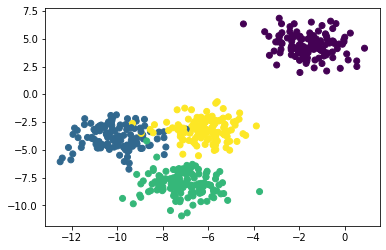

In [63]:
# Generar los datos.
# Esta configuración particular tiene un grupo distinto y 3 grupos colocados muy juntos.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Graficar la distribución de los datos.
plt.scatter(X[:,0], X[:,1], c=y)

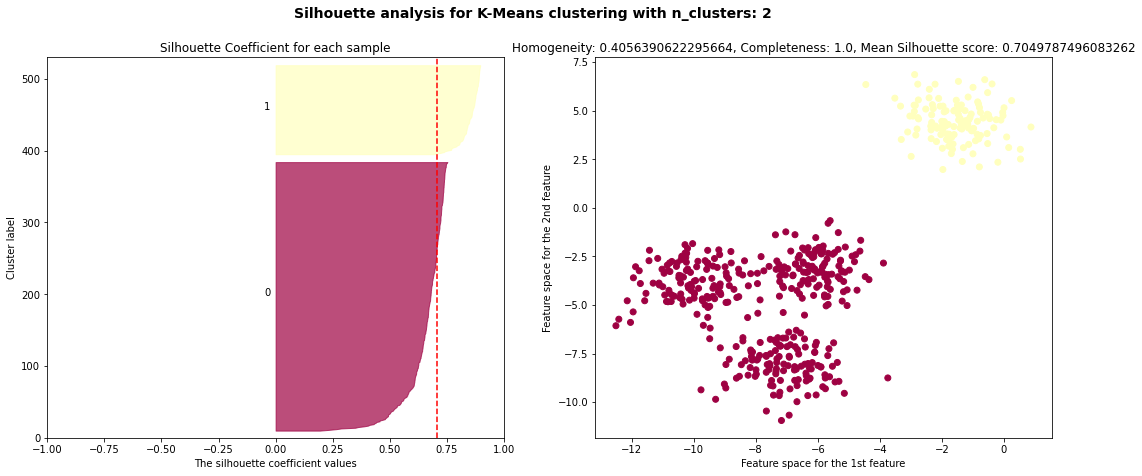

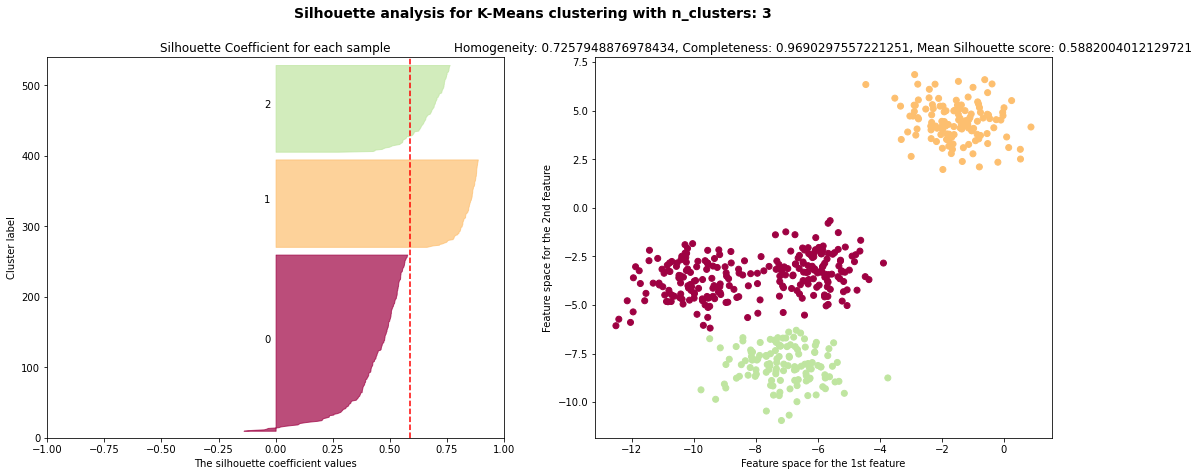

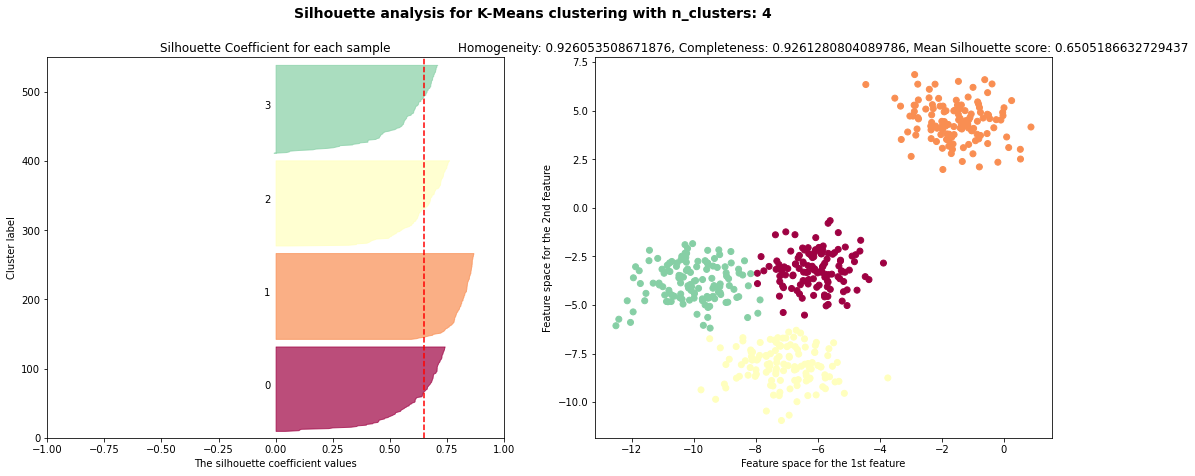

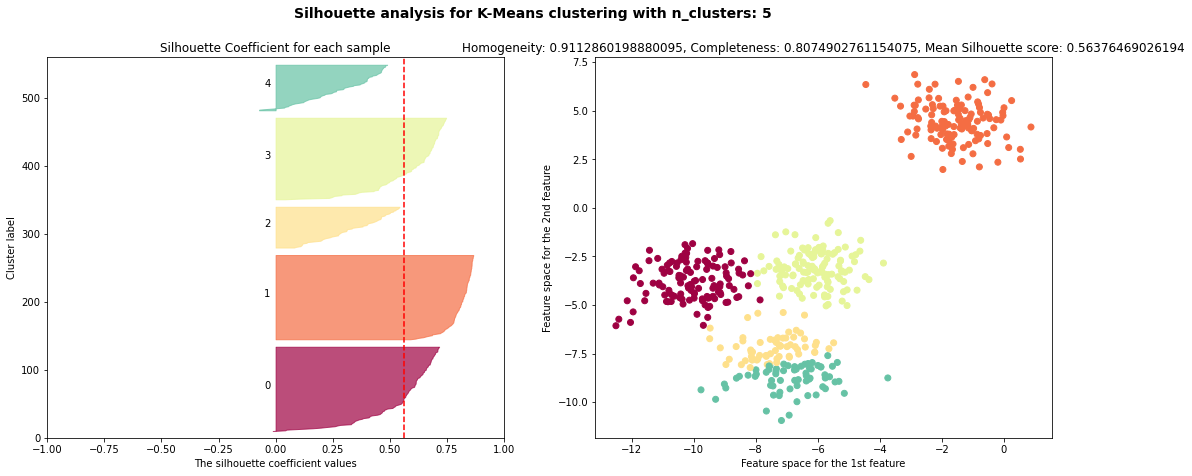

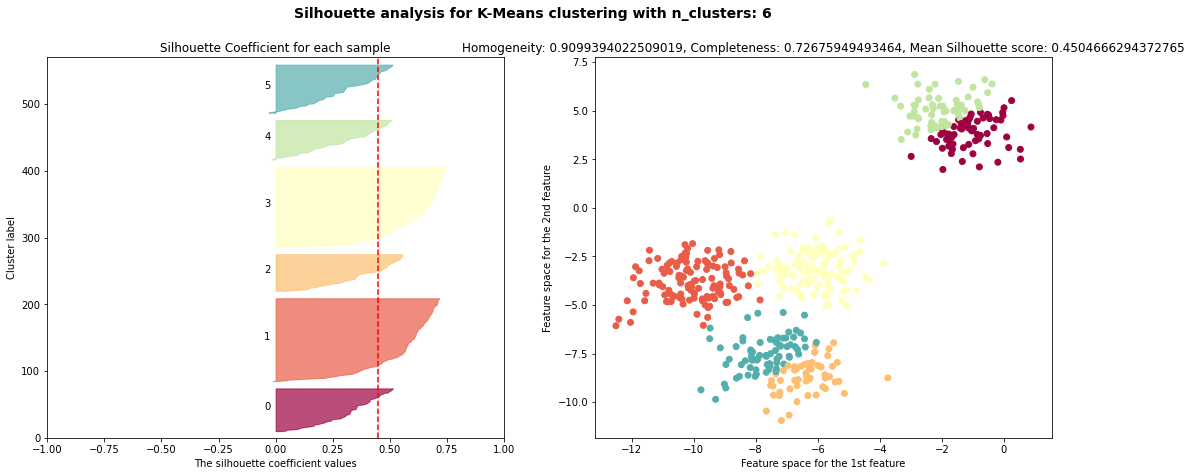

In [64]:
# Lista de número de clústeres
range_n_clusters = [2, 3, 4, 5, 6]

# Para cada número de conglomerados, realice un análisis de Silhouette y visualice los resultados.
for n_clusters in range_n_clusters:
    
    # Realizar k-means.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(X)
    
    # Calcular la homogeneidad y la integridad de los clusteres.
    homogeneity = metrics.homogeneity_score(y, y_pred)
    completeness = metrics.completeness_score(y, y_pred)
    
    # Calcular el coeficiente de coeficiente de Silhouette para cada muestra.
    s = metrics.silhouette_samples(X, y_pred)
    
    # Calcule el coeficiente de Silhouette medio de todos los puntos de datos.
    s_mean = metrics.silhouette_score(X, y_pred)
    
    # For plot configuration -----------------------------------------------------------------------------------
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Configure plot.
    plt.suptitle('Silhouette analysis for K-Means clustering with n_clusters: {}'.format(n_clusters),
                 fontsize=14, fontweight='bold')
    
    # Configure 1st subplot.
    ax1.set_title('Silhouette Coefficient for each sample')
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Configure 2st subplot.
    ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity,
                                                                                        completeness,
                                                                                        s_mean))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    # For 1st subplot ------------------------------------------------------------------------------------------
    
    # Plot Silhouette Coefficient for each sample
    cmap = cm.get_cmap("Spectral")
    y_lower = 10
    for i in range(n_clusters):
        ith_s = s[y_pred == i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    # Plot the mean Silhouette Coefficient using red vertical dash line.
    ax1.axvline(x=s_mean, color="red", linestyle="--")
    
    # For 2st subplot -------------------------------------------------------------------------------------------
    
    # Plot the predictions
    colors = cmap(y_pred.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], c=colors)

El gráfico de silueta muestra que el valor `n_clusters` de 3, 5 y 6 es una mala elección para los datos dados debido a la presencia de clústeres con puntajes de silueta por encima del promedio y también debido a las amplias fluctuaciones en el tamaño de los gráficos de silueta. El análisis de la silueta es más ambivalente al decidir entre 2 y 4.

### Problema 2: No se pueden manejar datos con ruido y valores atípicos

Incluso los datos de ruido y los valores atípicos se observan fácilmente a partir de los siguientes resultados de agrupación (los puntos de datos que están relativamente lejos de los centroides), *K-means* aún los coloca en las agrupaciones.

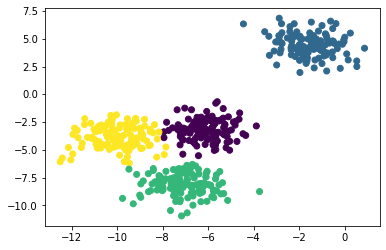

In [65]:
# Generar datos.
# Esta configuración en particular tiene un grupo distinto y 3 grupos colocados muy juntos.
# (Igual que el ejemplo anterior)
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Perform k-means with n_clusters=4
kmeans = KMeans(n_clusters=4, random_state=10)
y_pred = kmeans.fit_predict(X)

# Plot the prediction
plt.scatter(X[:,0], X[:,1], c=y_pred)

##### Solución: Usar el umbral de distancia para detectar datos de ruido y valores atípicos

Sin embargo, podemos detectar los ruidos/valores atípicos que condicionan si la distancia entre el punto de datos $x_i$ y el centroide $c_j$ del grupo correspondiente de $x_i$ es mayor que la distancia promedio en el grupo. Es decir:

$$
\begin{equation}
  x_i=\left\{
  \begin{array}{ll}
    \text{Outlier}, & \text{if}\ D(x_i, c_j) \gt \frac{1}{\left\vert Cluster_j \right\vert} \sum_{k=0,\ k \neq i}^{\left\vert Cluster_j \right\vert}{D(x_k,c_j)} \\
    \text{Non-outlier}, & \text{otherwise}
  \end{array}\right.
  \text{where } c_j \in Cluster_j
\end{equation}
$$

Comencemos a descubrir los valores atípicos de cada grupo.

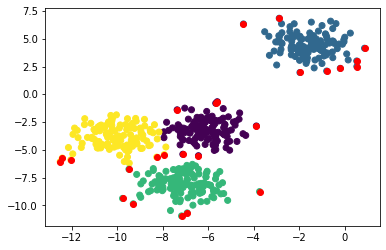

In [66]:
# Relación para nuestro umbral de distancia, controlando cuántos valores atípicos queremos detectar.
distance_threshold_ratio = 2.0

# Grafica la predición como se hace más arriba
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Para cada grupo i-ésimo, i=0~3 (tenemos 4 grupos en este ejemplo).
for i in [0, 1, 2, 3]:
    
    # Recupere el índice de los puntos de datos que pertenecen al grupo i. 
    # Nota: `np.where()` devuelve los índices en una tupla, por lo que recuperamos los índices usando `tuple[0]`
    indexs_of_X_in_ith_cluster = np.where(y_pred == i)[0]

    # Recuperar los puntos de datos por los índices
    X_in_ith_cluster = X[indexs_of_X_in_ith_cluster]
    
    # Recuperar el centroide.
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)

    # Calcule las distancias entre los puntos de datos y el centroide.
    # Igual que: np.sqrt(np.sum(np.square(X_in_ith_cluster - centroid), axis=1))
    # Nota: distances.shape = (X_in_ith_cluster.shape[0], 1). A 2-D matrix.
    distances = metrics.pairwise.euclidean_distances(X_in_ith_cluster, centroid)
    
    # Calcule la distancia media para el grupo i-ésimo como nuestro umbral de distancia.
    distance_threshold = np.mean(distances)
    
    # Recuperar el índice de valores atípicos en el grupo i-ésimo 
    # Nota: distances.flatten() aplana la matriz 2-D al vector, para comparar con el `umbral de distancia` escalar.
    indexs_of_outlier = np.where(distances.flatten() > distance_threshold * distance_threshold_ratio)[0]
    
    # Recuperar valores atípicos en el clúster por los índices
    outliers = X_in_ith_cluster[indexs_of_outlier]
    
    # Trazar los valores atípicos en i-ésimo grupo.
    plt.scatter(outliers[:,0], outliers[:,1], c='r')

Como mencionamos sobre la medición del análisis de la calidad del clúster, puede ejecutar diferentes configuraciones de `distance_threshold_ratio` para encontrar la mejor calidad del clúster.

#### Problema 3: No se pueden manejar datos no esféricos

> *K-means* tiene como objetivo dividir n observaciones en k grupos en los que cada observación pertenece al grupo con **la media más cercana**. (Wikipedia) 

Dado que los círculos concéntricos tendrían aproximadamente la misma media, k-means no es adecuado para separarlos.

Generemos datos no esféricos y grafiquemos la distribución de los clusteres.

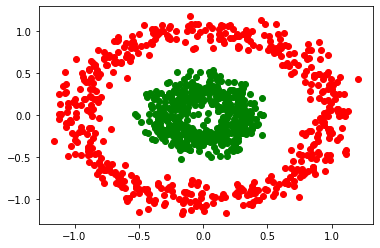

In [67]:
# Generar datos no esféricos.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Trazar la distribución de datos. (Aquí hay otra forma de trazar un gráfico de dispersión)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

Después de realizar *K-means* en datos no esféricos, el siguiente resultado muestra que no logra agrupar datos no esféricos, ya que *K-means* asume que la distribución de datos es esférica.

Homogeneity: 7.213624290760275e-05
Completeness: 7.213645104954194e-05
Mean Silhouette score: 0.2957429995137942


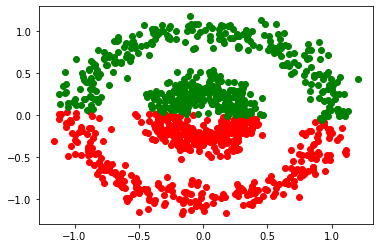

In [68]:
# Ejecutar k-means en datos no esféricos.
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Graficar las predicciones.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

# Imprimir las evaluaciones
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

#### Solución: el uso de técnicas de extracción o transformación de características hace que los datos se puedan agrupar

Si sabe que sus grupos siempre serán círculos concéntricos, simplemente puede convertir sus coordenadas cartesianas (x-y) en coordenadas polares y usar solo el radio para agrupar, ya que sabe que el ángulo theta no importa.

O, de manera más general: use un kernel adecuado para la agrupación en clústeres de k-means, p. use *Kernel PCA* para encontrar una proyección de los datos que los haga linealmente separables, o use otro algoritmo de agrupamiento, como *DBSCAN*.

In [69]:
def cart2pol(x, y):
    'Convierte coordenadas cartesianas (x-y) a polares.'
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return radius, theta

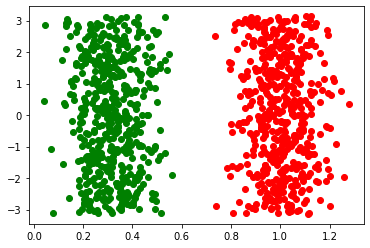

In [70]:

X_transformed = np.zeros_like(X)
X_transformed[:,0], X_transformed[:,1] = cart2pol(X[:,0], X[:,1])

plt.plot(X_transformed[y == 0, 0], X_transformed[y == 0, 1], 'ro')
plt.plot(X_transformed[y == 1, 0], X_transformed[y == 1, 1], 'go')

¡Simplemente logramos que los datos sean linealmente separables al convertir características (x-y) a (radio-theta)!

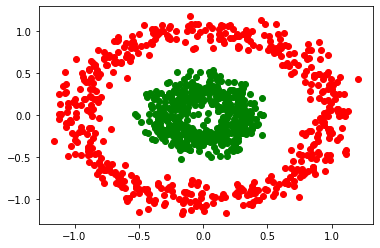

In [71]:
# Solo use la característica `radius` para agrupar.
X_transformed[:,1] = np.zeros_like(X_transformed[:,1]) 
y_pred = KMeans(n_clusters=2).fit_predict(X_transformed)

plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

### Ejercicio 5: Aplicando DBSCAN (_Density-Based Spatial Clustering of Applications with Noise_)

El algoritmo [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan) considera los clústeres como áreas de alta densidad separadas por áreas de baja densidad.

Debido a esta vista bastante genérica, los grupos encontrados por DBSCAN pueden tener cualquier forma, a diferencia de k-means, que asume que los grupos tienen forma convexa.

El componente central del DBSCAN es el **concepto de muestras de núcleo, que son muestras que se encuentran en áreas de alta densidad**. Por lo tanto, un conglomerado es un conjunto de muestras centrales, cada una cerca de la otra (medida por alguna medida de distancia) y un conjunto de muestras no centrales que están cerca de una muestra central (pero que no son muestras centrales en sí mismas).


#### Parámetros
- $Eps$: Radio máximo de la vecindad.
- $MinPts$: Número mínimo de puntos en el Eps-vecindario de un punto.

#### Términos
- La vecindad Eps de un punto $q$－$N_{Eps}$: Un punto $p \in N_{Eps}(q)$ si $D(p,q) \leq Eps$. (Señale dentro del círculo).
- Valor atípico: no en un clúster.
- Punto central: $\left\vert N_{Eps}(q) \right\vert \geq MinPts$ (vecindario denso).
- Punto fronterizo: En clúster pero la vecindad no es densa.

<div style="text-align:center"><img width="300px" src="resources/core-border-point.png"/></div>


- Directamente alcanzable por densidad: Un punto $p$ es **directamente alcanzable por densidad** desde un punto $q$ con $Eps$ y $MinPts$ si:
    - $p \in N_{Eps}(q)$, y $q$ es un **punto central**.
    - $p$ **no** tiene que ser un punto central.

<div style="text-align:center"><img width="250px" src="resources/directly-density-reachable.png"/></div>

- Densidad alcanzable: Un punto $p$ es **densidad alcanzable** desde un punto $q$ con respecto a $Eps$ y $MinPts$ si hay una cadena de puntos $p_1, \dots, p_n,\ p_1 = q,\ p_n = p$ tal que $p_{i+1}$ es directamente accesible por densidad desde $p_i ps

<div style="text-align:center"><img width="150px" src="resources/density-reachable.png"/></div>

#### El algoritmo
1. Elige aleatoriamente un punto $p$.
2. Recuperar todos los puntos de densidad alcanzable desde $p$ w.r.t. $Eps$ y $MinPts$.
3. Si $p$ es un punto central, se forma un grupo.
4. Si $p$ es un punto fronterizo, no se puede alcanzar la densidad de ningún punto desde $p$, luego visite el siguiente punto.
5. Repita el proceso hasta que se hayan procesado todos los puntos de datos.

Comencemos a realizar *DBSCAN* en datos esféricos

Number of clusters: 3
Homogeneity: 0.982039796604876
Completeness: 0.9378109619395731
Mean Silhouette score: 0.6798548805414468


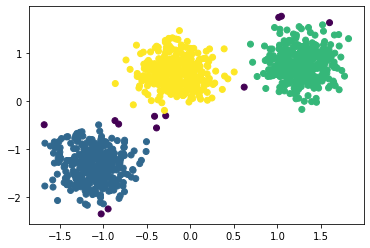

In [72]:
# Generar los datos con 3 centros.
X, y = make_blobs(n_samples=1000, 
                  n_features=2, 
                  centers=3,
                  random_state=170)

# Estandariza características a media cero y varianza unitaria.
X = StandardScaler().fit_transform(X)

# Realizar DBSCAN en los datos
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)

# Graficar las predicciones
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Imprimir las evaluaciones
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

Los puntos de datos **negros** indican los **valores atípicos** en el resultado anterior.

Tenga en cuenta que no necesitamos especificar el número de clústeres con el algoritmo *DBSCAN*. Además, *DBSCAN* es bueno para descubrir los valores atípicos sin requerir algunos trucos como hicimos anteriormente en la sección *K-means*.

Ahora, probemos *DBSCAN* con datos no esféricos.

Number of clusters: 2
Homogeneity: 0.9999999999999993
Completeness: 0.9742244183154621
Mean Silhouette score: 0.17876037034401593


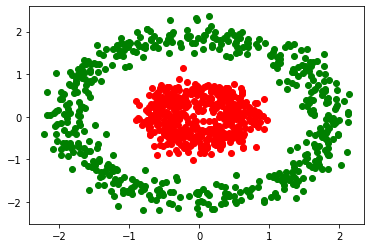

In [73]:
# Generate non-spherical data.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

# Print the evaluations
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

En comparación con *K-means*, podemos aplicar directamente *DBSCAN* en esta forma de distribución de datos debido al criterio de agrupamiento basado en la densidad.

Nota: vale la pena mencionar que la *puntuación de Silhouette* es generalmente más alta para los clústeres **convexos** que para otros conceptos de clústeres, como los clústeres basados en la densidad.